In [9]:
!pip install gekko

import numpy as np
import matplotlib.pyplot as plt

from gekko import GEKKO

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           5000
 Number of total equations: -         4000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :           1000
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.44640E+02  2.00000E+00
    1  5.59177E-01  7.03125E-02
    2  5.20300E-

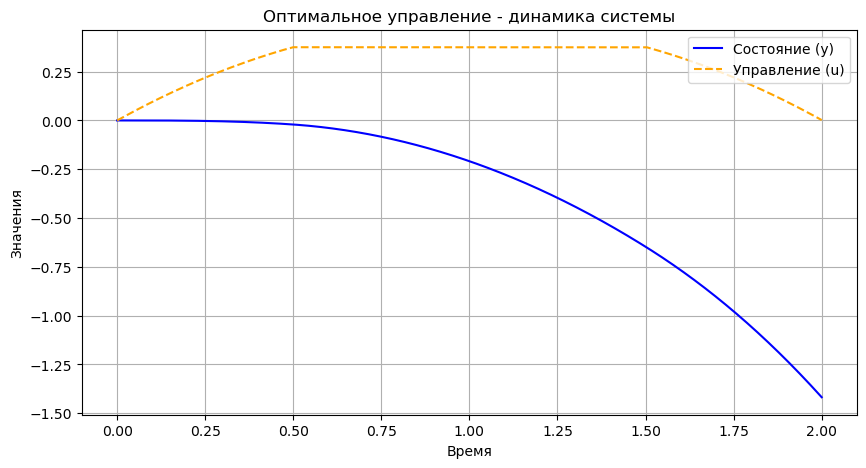

In [37]:
# Задание 7 (а)

# Небольшой комментарий касательно Задания 7:
# И в пункте а)., и в пункте б). задачи 7 будем использовать GEKKO -
# он позволяет легко работать с диффурами, накладывать ограничения на переменные
# и без особого труда работать с конечным временем.

# Инициализируем среду моделирования:

model = GEKKO(remote=False)
time_steps = 1001
model.time = np.linspace(0, 2, time_steps)

# Добавим в модель переменные согласно условию задачи:

state_y = model.Var(value=0)  # начальное состояние y(0) = 0
integral_z = model.Var(value=0)  # начальное значение интеграла
control_u = model.Var(value=0, lb=-0.375, ub=0.375)  # ограниченное управление
time_param = model.Param(value=model.time)  # параметр времени

# Введем параметр для учета конечного времени:

final_weight = np.zeros(time_steps)
final_weight[-1] = 1
final_time = model.Param(value=final_weight)

# Диффуры будут иметь вид:

model.Equation(state_y.dt() == control_u - time_param)
model.Equation(integral_z.dt() == 0.5 * control_u**2 - time_param * state_y + state_y)

# Определим оптимизируемую функцию:

model.Obj(integral_z * final_time)  # минимизировать интеграл будем только в последнем моменте

# Сконфигурируем "решатель":

model.options.IMODE = 6  # здесь установим режим оптимального управления
model.options.SOLVER = 3  # здесь укажем, что будем использовать APOPT

# Произведем расчеты при помощи нашей модели:

model.solve(disp=True)

# Ну и визуализируем результаты:

plt.figure(figsize=(10, 5))
plt.plot(model.time, state_y.value, label='Состояние (y)', color='blue', linestyle='-')
plt.plot(model.time, control_u.value, label='Управление (u)', color='orange', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.title('Оптимальное управление - динамика системы')
plt.legend(loc='upper right')
plt.grid()
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           2100
 Number of total equations: -         1800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            300
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  3.74708E+03  1.00000E+00
    1  5.47781E+00  6.47722E-01
    2  5.45686E+

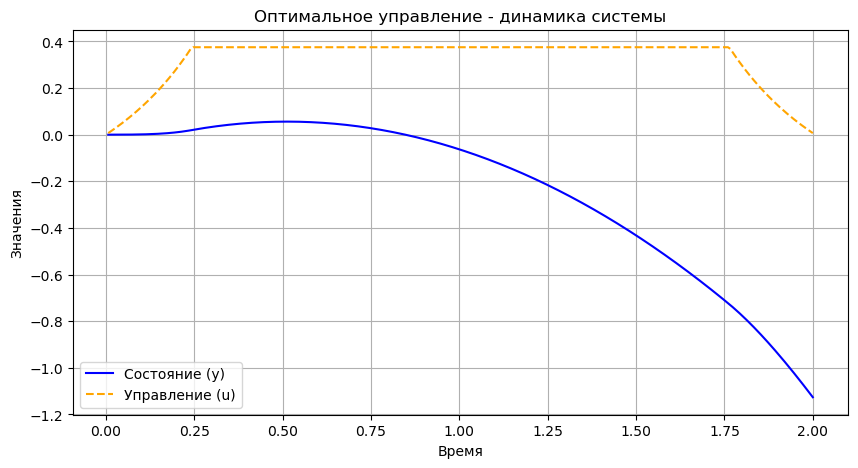

In [39]:
# Задание 7 (б)

# Вновь зададим gekko-модель:

model = GEKKO(remote=False)
time_points = 301
model.time = np.linspace(0, 2, time_points)

# Объявим переменные:

state = model.Var(value=0)  
integral = model.Var(value=5)  
control = model.Var(value=0, lb=-0.375, ub=0.375)  
time_var = model.Var(value=0)  
final_param = np.zeros(time_points)  
final_param[-1] = 1.0  
final_time = model.Param(value=final_param)

# Зададим уравнения динамики системы:

model.Equation(state.dt() == control + control**2 - time_var)  # диффур состояния
model.Equation(time_var.dt() == 1)  # ур-ие для изменения времени
model.Equation(integral.dt() == 0.5 * control**2 - time_var * state + state)  # интегральное уравнение

# Теперь минимизируем интеграл на конечном временном шаге:

model.Obj(integral * final_time)

# Настроим конфиг:

model.options.IMODE = 6 # (опять 6 режим)
model.solve(disp=True)

# Графики:

plt.figure(figsize=(10, 5))
plt.plot(model.time[1:], state.value[1:], label='Состояние (y)', color='blue', linestyle='-')
plt.plot(model.time[1:], control.value[1:], label='Управление (u)', color='orange', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.title('Оптимальное управление - динамика системы')
plt.legend(loc='best')
plt.grid()
plt.show()